Epoch: 100; Error: 1.825569789715984;
Epoch: 200; Error: 1.1443095921501336;
Epoch: 300; Error: 0.12538528939727944;
Epoch: 400; Error: 0.07317487602588496;
Epoch: 500; Error: 0.07148776137406483;
Epoch: 600; Error: 0.08905026294186957;
Epoch: 700; Error: 0.088925025874205;
Epoch: 800; Error: 0.08366182389104708;
Epoch: 900; Error: 0.08456381770548957;
Epoch: 1000; Error: 0.0828408413865161;
Epoch: 1100; Error: 0.0736403326934148;
Epoch: 1200; Error: 0.06060969112717584;
Epoch: 1300; Error: 0.0467557052506316;
Epoch: 1400; Error: 0.03626863846802393;
Epoch: 1500; Error: 0.030519516976839058;
Epoch: 1600; Error: 0.026063014696721204;
Epoch: 1700; Error: 0.022262537149328;
Epoch: 1800; Error: 0.02008209391138108;
Epoch: 1900; Error: 0.018907586443364585;
Epoch: 2000; Error: 0.017815226178739374;
The maximum number of train epochs is reached


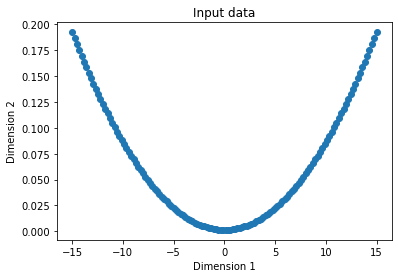

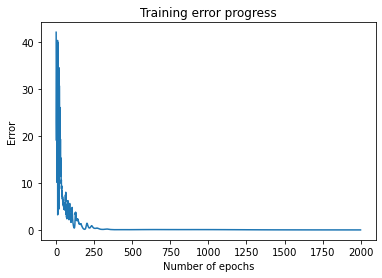

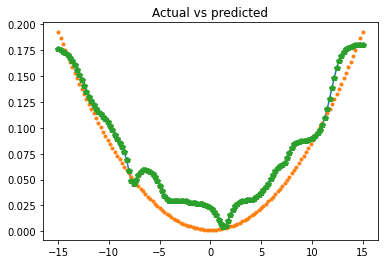

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import neurolab as nl

# Generate some training data
min_val = -15
max_val = 15
num_points = 130
x = np.linspace(min_val, max_val, num_points)
y = 3 * np.square(x) + 5
y /= np.linalg.norm(y)

# Create data and labels
data = x.reshape(num_points, 1)
labels = y.reshape(num_points, 1)

# Plot input data
plt.figure()
plt.scatter(data, labels)
plt.xlabel('Dimension 1')
plt.ylabel('Dimension 2')
plt.title('Input data')

# Define a multilayer neural network with 2 hidden layers;
# First hidden layer consists of 10 neurons
# Second hidden layer consists of 6 neurons
# Output layer consists of 1 neuron
nn = nl.net.newff([[min_val, max_val]], [10, 6, 1])

# Set the training algorithm to gradient descent
nn.trainf = nl.train.train_gd

# Train the neural network
error_progress = nn.train(data, labels, epochs=2000, show=100, goal=0.01)

# Run the neural network on training datapoints
output = nn.sim(data)
y_pred = output.reshape(num_points)

# Plot training error
plt.figure()
plt.plot(error_progress)
plt.xlabel('Number of epochs')
plt.ylabel('Error')
plt.title('Training error progress')

# Plot the output 
x_dense = np.linspace(min_val, max_val, num_points * 2)
y_dense_pred = nn.sim(x_dense.reshape(x_dense.size,1)).reshape(x_dense.size)

plt.figure()
plt.plot(x_dense, y_dense_pred, '-', x, y, '.', x, y_pred, 'p')
plt.title('Actual vs predicted')

plt.show()